In [ ]:
import geopandas as gpd
# Read shp data of Taiwan county 
# 縣市界
County_data = gpd.read_file("./COUNTY_MOI_1130718.shp")
# Display data 顯示前5筆
County_data.head()

In [ ]:
## plot data
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

In [ ]:
County_data=County_data.to_crs(epsg=3826)
Sample_data = County_data.loc[:, ['COUNTYNAME', 'geometry']]
Sample_data.plot()

In [ ]:
import pandas as pd
# 讀取 CSV 數據
csv_data = pd.read_csv('082-所得收入者各縣市別平均每人受僱人員報酬.csv')
csv_data = csv_data.T  # 转置数据

# 重新命名列
csv_data.columns = csv_data.iloc[0]
csv_data = csv_data.drop(csv_data.index[0])
csv_data = csv_data.reset_index()
csv_data.columns = ['region', 'income']
csv_data['income'] = csv_data['income'].astype(int)

# 顯示轉置後的收入數據
print("Transformed Income Data:")
print(csv_data)

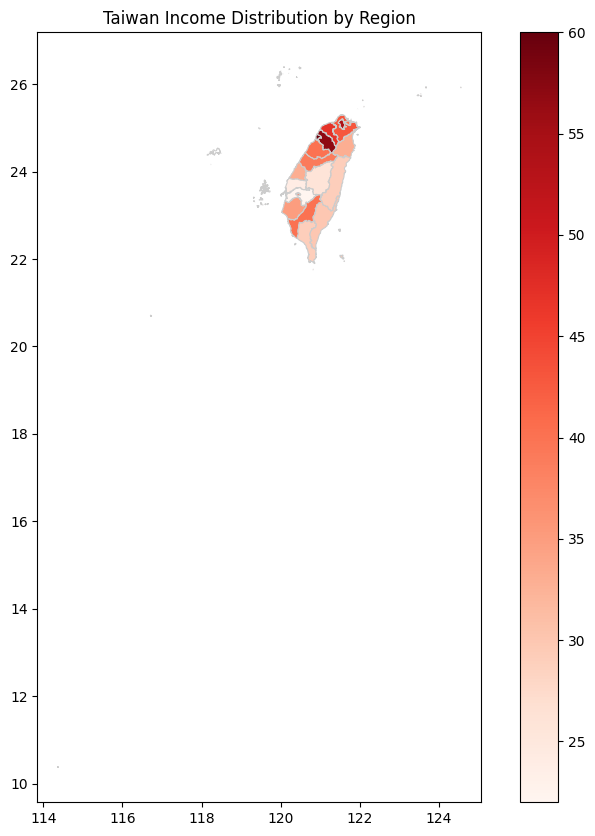

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


csv_data = pd.read_csv('082-所得收入者各縣市別平均每人受僱人員報酬.csv')
csv_data = csv_data.T 


csv_data.columns = csv_data.iloc[0]
csv_data = csv_data.drop(csv_data.index[0])
csv_data = csv_data.reset_index()
csv_data.columns = ['region', 'income']
csv_data['income'] = csv_data['income'].astype(int)


taiwan_map = gpd.read_file('COUNTY_MOI_1130718.shp') 


csv_data['region'] = csv_data['region'].str.strip()
taiwan_map["COUNTYNAME"] = taiwan_map["COUNTYNAME"].str.strip()


map_data = taiwan_map.set_index("COUNTYNAME").join(csv_data.set_index('region'))
map_data["income"] = map_data["income"]//10000


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
map_data.plot(column='income', ax=ax, legend=True,
              cmap='Reds',edgecolor='0.8',linewidth=0.8, missing_kwds={"color": "white"})


plt.title('Taiwan Income Distribution by Region')


plt.show()
